##  Optimze and a Dense Neural Network for gap filling and feature identification

** With a few tweaks to RepRunner, an LSTM can be run instead

In [6]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
# from functools import partial
from multiprocessing import Pool
from functools import partial
from sklearn import metrics
# from sklearn.model_selection import train_test_split

## Personal Modules
import ReadStandardTimeFill as RSTF
import importlib
import DenseNet as Dense
import MiscFuncs as MF
importlib.reload(Dense)
importlib.reload(RSTF)
importlib.reload(MF)

# %matplotlib inline

%matplotlib notebook
%config IPCompleter.greedy=True

from scipy.optimize import minimize, curve_fit
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from sklearn.externals import joblib
from matplotlib import cm

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from ipywidgets import FloatProgress
from IPython.display import display
import os  
import shutil
from keras import backend as K
try:pool.close()
except:pass


def Test(params,X,y,YScaled,XScaled,pool):
    return(np.random.rand(params['K']))


def ModSelect(Scope,Site):
    if Site == 'Illisarvik':
        if Scope == 'Full':
            Model = ['H','wind_speed','air_pressure','PPFD_Avg','AirTC_Avg','VPD',
                    'Temp','VWC','Sedge','Shrub','Grass','Sparse','Out_of_Basin']
        if Scope == 'Test':
            Model = ['PPFD_Avg','VWC','wind_speed','Sedge']
    if Site == 'FishIsland':
        BaseFactors = []
        if Scope == 'Full':
            Model = ['H','Wind Spd','air pressure','Ta','Rn','PPFD','Rain','Water Table',
            'Ts 2.5 cm','Ts 15 cm','VWC','Active Layer','24H Rain','Wtr Tbl Trnd']
        if Scope == 'Test':
            Model = ['H','Water Table','Wind Spd','Active Layer']
    return(Model)

def Combos(Model,L,factor=None):
    Models=[]
    for c in combinations(Model,L):
        c = list(c)
        if factor is None:
            Models.append(c)
        else:
            for f in factor:
                f = f.split('+')
                if set(f).issubset(set(c)) and c not in Models:
                    Models.append(c)
                    
    print('Models: ',Models)
    return(Models)

def Stats(mse,j,i,params):
    df = pd.DataFrame(index = [str(j)+'_'+str(i)],
                      data={'Model':[params['Model']],
                            'MSE':[mse.mean()],
                            'SE':[mse.std()/params['K']**.5],
                            'Performance':0})
    return(df)

def t(p,n):
    alpha = 1-p
    df = n-1
    return(stats.t.ppf(alpha,df))


FirstRun = True
# FirstRun = False

MP=True
Scope = 'Full'
cwd = os.getcwd()
# for Site in ['Illisarvik','FishIsland']:
Site='Illisarvik'
target='fco2'
T= 1#t(0.05,params['K'])

# Model

A Jupyter Widget

Models:  [['H'], ['wind_speed'], ['air_pressure'], ['PPFD_Avg'], ['AirTC_Avg'], ['VPD'], ['Temp'], ['VWC'], ['Sedge'], ['Shrub'], ['Grass'], ['Sparse'], ['Out_of_Basin']]


/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'PPFD_Avg'], ['wind_speed', 'PPFD_Avg'], ['air_pressure', 'PPFD_Avg'], ['PPFD_Avg', 'AirTC_Avg'], ['PPFD_Avg', 'VPD'], ['PPFD_Avg', 'Temp'], ['PPFD_Avg', 'VWC'], ['PPFD_Avg', 'Sedge'], ['PPFD_Avg', 'Shrub'], ['PPFD_Avg', 'Grass'], ['PPFD_Avg', 'Sparse'], ['PPFD_Avg', 'Out_of_Basin']]


/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'PPFD_Avg'], ['H', 'air_pressure', 'PPFD_Avg'], ['H', 'PPFD_Avg', 'VPD'], ['H', 'PPFD_Avg', 'VWC'], ['H', 'PPFD_Avg', 'Out_of_Basin'], ['wind_speed', 'air_pressure', 'PPFD_Avg'], ['wind_speed', 'PPFD_Avg', 'AirTC_Avg'], ['wind_speed', 'PPFD_Avg', 'VPD'], ['wind_speed', 'PPFD_Avg', 'Temp'], ['wind_speed', 'PPFD_Avg', 'VWC'], ['wind_speed', 'PPFD_Avg', 'Sedge'], ['wind_speed', 'PPFD_Avg', 'Shrub'], ['wind_speed', 'PPFD_Avg', 'Grass'], ['wind_speed', 'PPFD_Avg', 'Sparse'], ['wind_speed', 'PPFD_Avg', 'Out_of_Basin'], ['air_pressure', 'PPFD_Avg', 'AirTC_Avg'], ['air_pressure', 'PPFD_Avg', 'VPD'], ['air_pressure', 'PPFD_Avg', 'Temp'], ['air_pressure', 'PPFD_Avg', 'VWC'], ['air_pressure', 'PPFD_Avg', 'Sedge'], ['air_pressure', 'PPFD_Avg', 'Shrub'], ['air_pressure', 'PPFD_Avg', 'Grass'], ['air_pressure', 'PPFD_Avg', 'Sparse'], ['air_pressure', 'PPFD_Avg', 'Out_of_Basin'], ['PPFD_Avg', 'AirTC_Avg', 'VPD'], ['PPFD_Avg', 'AirTC_Avg', 'VWC'], ['PPFD_Avg', 'AirTC_Avg',

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'PPFD_Avg', 'VWC'], ['H', 'air_pressure', 'PPFD_Avg', 'VWC'], ['H', 'PPFD_Avg', 'AirTC_Avg', 'VWC'], ['H', 'PPFD_Avg', 'VPD', 'VWC'], ['H', 'PPFD_Avg', 'Temp', 'VWC'], ['H', 'PPFD_Avg', 'VWC', 'Sedge'], ['H', 'PPFD_Avg', 'VWC', 'Shrub'], ['H', 'PPFD_Avg', 'VWC', 'Grass'], ['H', 'PPFD_Avg', 'VWC', 'Sparse'], ['H', 'PPFD_Avg', 'VWC', 'Out_of_Basin'], ['wind_speed', 'PPFD_Avg', 'AirTC_Avg', 'VWC'], ['air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VWC'], ['PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC'], ['PPFD_Avg', 'AirTC_Avg', 'Temp', 'VWC'], ['PPFD_Avg', 'AirTC_Avg', 'VWC', 'Sedge'], ['PPFD_Avg', 'AirTC_Avg', 'VWC', 'Shrub'], ['PPFD_Avg', 'AirTC_Avg', 'VWC', 'Grass'], ['PPFD_Avg', 'AirTC_Avg', 'VWC', 'Sparse'], ['PPFD_Avg', 'AirTC_Avg', 'VWC', 'Out_of_Basin']]


/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC'], ['H', 'wind_speed', 'PPFD_Avg', 'VWC', 'Out_of_Basin'], ['H', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC'], ['H', 'air_pressure', 'PPFD_Avg', 'VWC', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC'], ['H', 'PPFD_Avg', 'AirTC_Avg', 'VWC', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'VPD', 'Temp', 'VWC'], ['H', 'PPFD_Avg', 'VPD', 'VWC', 'Sedge'], ['H', 'PPFD_Avg', 'VPD', 'VWC', 'Shrub'], ['H', 'PPFD_Avg', 'VPD', 'VWC', 'Grass'], ['H', 'PPFD_Avg', 'VPD', 'VWC', 'Sparse'], ['H', 'PPFD_Avg', 'VPD', 'VWC', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'Temp', 'VWC', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'VWC', 'Sedge', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'VWC', 'Shrub', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'VWC', 'Grass', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'VWC', 'Sparse', 'Out_of_Basin']]


/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC'], ['H', 'wind_speed', 'PPFD_Avg', 'AirTC_Avg', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC', 'Shrub'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'Temp', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VWC', 'Sedge', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VWC', 'Shrub', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VWC', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VWC', 'Sparse', 'Out_of_Basin'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC'], ['H', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Shrub'], ['H', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Out_of_Basin'], ['H', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC'], ['H', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge'], ['H', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Shrub

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'Temp', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC', 'Sedge', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC', 'Shrub', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', 'VPD', 'VWC', 'Sparse', 'Out_of_Basin'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Shrub'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Grass'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sparse'], ['H', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Shrub'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Grass'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sparse'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'Temp', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Sedge', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Shrub', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'VWC', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'PPFD_Avg', '

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Shrub'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Grass'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sparse'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Shrub'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Grass'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Sparse'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Shrub', 'Grass'], ['H', 'wind_speed', 'air_pressure', 'PP

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Sparse'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Shrub', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Shrub', 'Sparse'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Shrub', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Grass', 'Sparse'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', '

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Shrub', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Shrub', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Shrub', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Grass', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Av

/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_

Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Grass', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Grass', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Shrub', 'Grass', 'Sparse', 'Out_of_Basin'], ['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Grass', 'Sparse', 'Out_of_Basin']]


/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)
/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)


Models:  [['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Grass', 'Sparse', 'Out_of_Basin']]


/home/ubuntu/NetworkAnalysis/DenseNet.py:168: RuntimeWarning: Mean of empty slice
  Y_hat_val_bar=np.nanmean(Y_hat_val,axis=0)


<IPython.core.display.Javascript object>


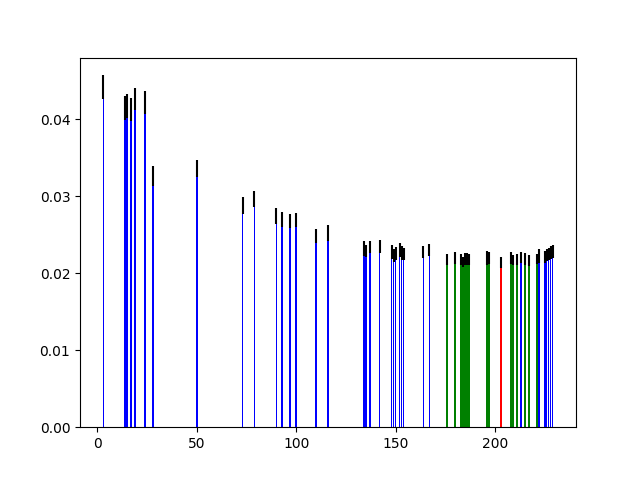

In [7]:

if __name__ == '__main__' and FirstRun == True:
    XVarriables=ModSelect(Scope,Site)
    prog = FloatProgress(min=0, max=len(XVarriables)+1,description='Running:') # instantiate the bar
    display(prog) # display the bar
    try:shutil.rmtree(cwd+'/'+Site+'/'+target+'/')
    except:pass
    os.mkdir(cwd+'/'+Site+'/'+target+'/')
    for j in range(1,len(XVarriables)+1):
        if j == 1: Inputs = (Combos(XVarriables,j))
        else: Inputs = (Combos(XVarriables,j,Factors))
        i = 0
        for Input in Inputs:
            params = Dense.Params(Scope,target,MP)
            params['Dpath'] = cwd+'/'+Site+'/'
            params['Spath'] = params['Dpath']+'/'+target+'/'+str(j)+'_'+str(i)+'/'
            try:os.mkdir(params['Spath'])
            except:pass
            params['Sname'] = 'Y_'
            params['Inputs'] = Input
            params['Model'] = '+'.join(params['Inputs'])
            RST = RSTF.ReadStandardTimeFill(params,'ECData.csv')#,resample='2H')
            RST.Scale(params['target'],params['Inputs']) 
            y = RST.y*1.0
            X = RST.X*1.0
            params['N']=int(y.shape[0]/30)
            params['Memory'] = (math.floor(100/params['proc'])- 5/params['proc']) * .01
            Y_hat=[]
            y_true=[]
            X_true=[]
            index=[]
            ones=[]
            if MP == False:
                for k in range(params['K']):
                    results = Dense.TTV_Split(k,params,X,y)
                    Y_hat.append(RST.YScaled.inverse_transform(results[0]))
                    y_true.append(RST.YScaled.inverse_transform(results[1]))
                    X_true.append(RST.XScaled.inverse_transform(results[2]))
                    index.append(results[3])
                    ones.append(results[4])
            else:
                pool = Pool(processes=3,maxtasksperchild=75)
                for k,results in enumerate(pool.imap(partial(Dense.TTV_Split,params=params,X=X,y=y),range(params['K']))):
                    Y_hat.append(RST.YScaled.inverse_transform(results[0]))
                    y_true.append(RST.YScaled.inverse_transform(results[1]))
                    X_true.append(RST.XScaled.inverse_transform(results[2]))
                    index.append(results[3])
                    ones.append(results[4])
                pool.close()
            Y_hat = np.squeeze(np.asanyarray(Y_hat))
            y_true = np.squeeze(np.asanyarray(y_true))
            X_true = np.asanyarray(X_true)
            index = np.asanyarray(index)
            ones = np.asanyarray(ones)
            params['Memory'] = .95
            if MP == False:
                for k in range(1):
                     mse = Dense.Sort_outputs(k,params,Y_hat,y_true,X_true,index,ones)
            else:
                pool = Pool(processes=1,maxtasksperchild=75)
                for k,results in enumerate(pool.imap(partial(Dense.Sort_outputs,params=params,
                 Y_hat=Y_hat,y_true=y_true,X_true=X_true,index=index,ones=ones),range(1))):
                     mse = results
                pool.close()
            if i == 0:Level = Stats(mse,j,i,params)
            else:Level = Level.append(Stats(mse,j,i,params))
            i += 1
            prog.value=j+i/len(Inputs)
        Min = Level.loc[Level['MSE']==Level['MSE']].min()
        T= 1#t(0.05,params['K'])
        Factors = Level.loc[Level['MSE']<=Min['MSE']+Min['SE']*T,'Model'].values
        Level.loc[Level['MSE']<=Min['MSE']+Min['SE']*T,'Performance']=1
        if j == 1:Records = Level
        else:Records = Records.append(Level)

    Records = Records.reset_index()
    plt.figure()
    Min = Records.loc[Records['MSE']==Records['MSE']].min()
    Records.loc[Records['MSE']<=Min['MSE']+Min['SE']*T,'Performance']=2
    Records.loc[Records['MSE']==Min['MSE'],'Performance']=3
    Honorable = Records.loc[Records['Performance']==1]
    Top = Records.loc[Records['Performance']==2]
    Best = Records.loc[Records['Performance']==3]
    plt.bar(Honorable.index,Honorable['MSE'],yerr=Honorable['SE'],color='blue')
    plt.bar(Top.index,Top['MSE'],yerr=Top['SE'],color='green')
    plt.bar(Best.index,Best['MSE'],yerr=Best['SE'],color='red')
    Records.to_csv(params['Dpath']+'/'+target+'_Runs.csv')
    FirstRun = False
else:    
    print('OldRun!')
#     params['Spath'] = params['Dpath']+'/'+target+'/'+str(j)+'_'+str(i)+'/'
    params = Dense.Params(Scope,target,MP)
    params['Dpath'] = cwd+'/'+Site+'/'
    RST = RSTF.ReadStandardTimeFill(params,'ECData.csv')#,resample='2H')
    params = Dense.Params(Scope,target,MP)
    params['Dpath'] = cwd+'/'+Site+'/'
    Records = pd.read_csv(params['Dpath']+'/'+target+'_Runs.csv',delimiter = ',',header = 0)
    plt.figure()
    Min = Records.loc[Records['MSE']==Records['MSE']].min()
    Records.loc[Records['MSE']<=Min['MSE']+Min['SE']*T,'Performance']=2
    Records.loc[Records['MSE']==Min['MSE'],'Performance']=3
    T= 1#t(0.05,params['K'])
    Honorable = Records.loc[Records['Performance']==1]
    Top = Records.loc[Records['Performance']==2]
    Best = Records.loc[Records['Performance']==3]
    plt.bar(Honorable.index,Honorable['MSE'],yerr=Honorable['SE'],color='blue')
    plt.bar(Top.index,Top['MSE'],yerr=Top['SE'],color='green')
    plt.bar(Best.index,Best['MSE'],yerr=Best['SE'],color='red')
    Records.to_csv(params['Dpath']+'/'+target+'_Runs.csv')

# Map Results

In [8]:
alt_mod=[False,'PPFD_Avg+wind_speed+Sedge']
BestMod = Best['Model'].values[0]
Project = True
Fill = False
if alt_mod[0] == True:
    Model = alt_mod[1]
else:
    Model = BestMod
idx = Records['index'].loc[Records['Model']==Model].values[0]
Model = Model.split('+')
params['Spath']=(params['Dpath']+'/'+target+'/'+idx+'/')
params['Inputs']=Model
RST.Scale(params['target'],params['Inputs'],ScalePath=params['Spath'])

# Predict

In [9]:

for ip in params['Inputs']:
    RST.Data[ip] = RST.Data[ip].mean()

Key = 'PPFD_Avg'
KeyRange = {'min':0,'max':1500}
RST.Data[Key] = np.linspace(KeyRange['min'],KeyRange['max'],RST.Data[Key].shape[0])
RST.Scale(params['target'],params['Inputs'],ScalePath=params['Spath'],Project=Project)
    


if __name__ == '__main__':
    if Fill == True:
        X = RST.X_fill
    else:
        X = RST.X
    params['Sname']='Y_'
    Y_fill = []
    MSE = []
#     for i in range(params['K']):
        
        
        
    if MP == False:
        for k in range(params['K']):
            Y = Dense.Load_Model(k,X,params)
            Y = RST.YScaled.inverse_transform(Y)
            if Fill == False:
                mse = (metrics.mean_squared_error(RST.y,Y))
                MSE.append(mse)
            Y_fill.append(Y)
    else:
        pool = Pool(processes=1,maxtasksperchild=75)
        for k,results in enumerate(pool.imap(partial(Dense.Load_Model,X=X,params=params),range(params['K']))):
            Y = results
            Y = RST.YScaled.inverse_transform(Y)
            if Fill == False:
                mse = (metrics.mean_squared_error(RST.y,Y))
                MSE.append(mse)
            Y_fill.append(Y)                       
        pool.close()
#         params['iteration']=i

#         Y = Dense.Load_Model(i,X,params)
#         Model = Dense.Load_Weights(Empty_Mod,params) 
#         Y = RST.YScaled.inverse_transform(Y)#Model.predict(X).reshape(-1,1))
#         if Fill == False:
#             mse = (metrics.mean_squared_error(RST.y,Y))
#             MSE.append(mse)
#         Y_fill.append(Y)
    Y_fill = np.asanyarray(Y_fill).mean(axis=-1)
    Y_fill_bar = Y_fill.mean(axis=0)
    if Fill == False:
        MSE = np.asanyarray(MSE)
        CI = stats.t.ppf(1-0.025,i)*MSE.std()/(i)**.5
        print(CI)

    YStandard = joblib.load(params['Spath']+"YVar_scaler.save") 
    params['Sname']='Var'
#     params['iteration']=1
    params['Loss']='Boot_Loss'
#     YVar = Dense.Load_Model(1,X,params)
#     Model = Dense.Load_Weights(Empty_Mod,params)        
    if MP == False:
        for k in range(1,2):
            YVar = Dense.Load_Model(k,X,params)
            YVar = RST.YScaled.inverse_transform(YVar)
#             if Fill == False:
#                 mse = (metrics.mean_squared_error(RST.y,Y))
#                 MSE.append(mse)
#             Y_fill.append(Y)
    else:
        pool = Pool(processes=1,maxtasksperchild=75)
        for k,results in enumerate(pool.imap(partial(Dense.Load_Model,X=X,params=params),range(1,2))):
            YVar = results
            YVar = RST.YScaled.inverse_transform(YVar)
#             if Fill == False:
#                 mse = (metrics.mean_squared_error(RST.y,Y))
#                 MSE.append(mse)
#             Y_fill.append(Y)                       
        pool.close()
#     YVar=YStandard.inverse_transform(YVar)#Model.predict(X).reshape(-1,1))
    X_back = np.squeeze(RST.XScaled.inverse_transform(X))


Data = pd.DataFrame(data=X_back,columns=params['Inputs'])
Data[target] = np.squeeze(Y_fill_bar)
Data['True'] = RST.Ytru#.YScaled.inverse_transform(RST.y)
Data['SE'] = 1/(params['K']-1)*((Y_fill-Y_fill_bar)**2).sum(axis=0)
Data['Var'] = np.squeeze(YVar)
Data['CI']=stats.t.ppf(1-0.025,params['K'])*(Data['SE'])**.5
Data['PI']=stats.t.ppf(1-0.025,params['K'])*((Data['Var']+Data['SE'])**.5) #the accuracy of our estimate with respect to the observed output

# print(Data['CI'].mean())
print(params['Inputs'])
print('Prediction mean: ',Data[target].mean())
print('Target mean: ',Data['True'].mean())
Data['Fill'] = Data['True'].fillna(Data[target])
print('GapFilled mean: ',Data['Fill'].mean())

Data.loc[np.isnan(Data['PI'])==True,'PI']=Data['CI']

1.26046478908
['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge', 'Sparse', 'Out_of_Basin']
Prediction mean:  -0.585158
Target mean:  -0.283950526883
GapFilled mean:  -0.283950526883


<IPython.core.display.Javascript object>


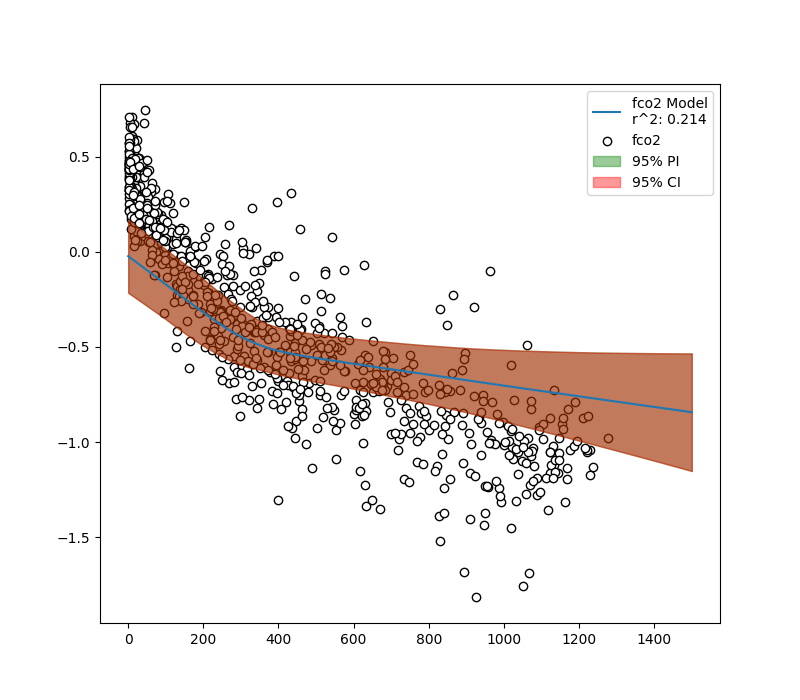

In [10]:

plt.figure(figsize=(8,7))
Data = Data.sort_values(by=Key)
# Data.index = Data[Key]

Data = Data[np.isfinite(Data['True'])]

plt.scatter(RST.Master[Key],RST.Master[target],edgecolor='black',facecolor='white')
plt.plot(Data[Key],Data[target],
         label= params['target']+' Model\nr^2: '+str(np.round(metrics.r2_score(Data['True'],
                                                                   Data[params['target']])**2,3)))
# plt.plot(Data.index,Data['Var'],label= params['target']+
# ' Model\nRMSE: '+str(np.round(metrics.mean_squared_error(Data['True'],
#                                                                    Data[params['target']])**2,3)))


plt.fill_between(Data[Key], Data[target]-Data['PI'], 
                 Data[target]+Data['PI'],  color = 'green', alpha = 0.4, 
                 label = '95% PI')
plt.fill_between(Data[Key], Data[target]-Data['CI'], 
                 Data[target]+Data['CI'],  color = 'red', alpha = 0.4, 
                 label = '95% CI')
plt.legend()
# print(RST.Master)

# plt.figure()

# plt.plot(Data[Key], Data['Var'])
plt.scatter(Data['target'],Data['True'])
print(Data['SE'])